In [1]:
#!pip install -U scikit-learn

In [3]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

### Import and Explore the Dataset

In [4]:
# Import the dataset using pandas into dataframe
titanic_df = pd.read_csv('titanic_train.csv')

# Check the imported dataset from dataframe
# We check top 10 rows of data to understand the dataset.
titanic_df.head(10)

# Optionally, you can use tail() methods to check the bottom rows of dataframe
# By default, only 5 rows are displayed.
#titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Check the shape of the dataframe
titanic_df.shape

(891, 12)

In [11]:
# Drop the columns which do not contribute to our problem
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],  axis='columns', inplace=True)

# Check again the top rows of the dataframe
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Check for null rows by row
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [13]:
# Drop rows with null value
titanic_df = titanic_df.dropna()

In [14]:
# Check the shape after dropping null value
titanic_df.shape

(712, 8)

In [15]:
# Recheck for the null value again
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
# Get the numerical description of each features
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [17]:
# Check for the top rows
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Visual Exploration

Text(0, 0.5, 'Survived')

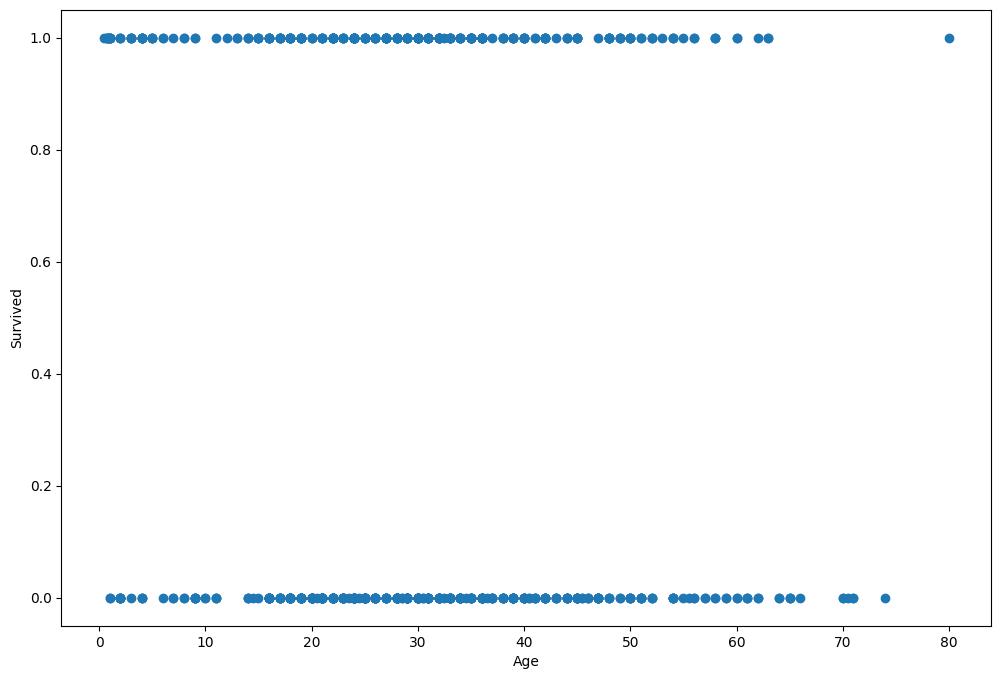

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

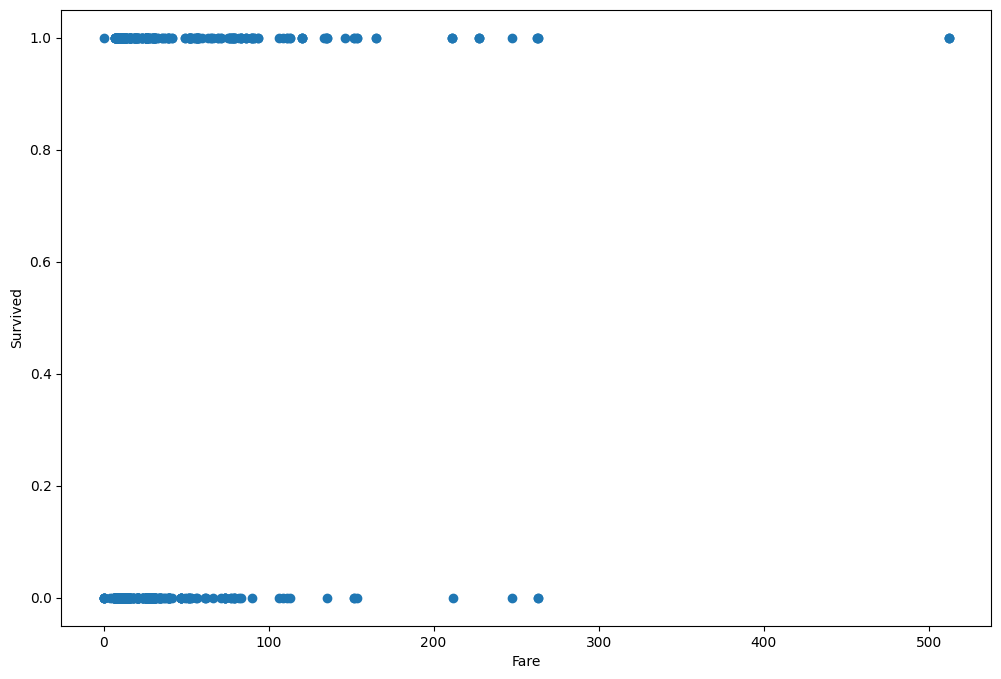

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [20]:
# Pivot the survived one based on gender
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [23]:
# Pivot the survived one based on Passenger Class
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [25]:
# Check the correlation among the features
titanic_data_corr = titanic_df.corr()

titanic_data_corr

ValueError: could not convert string to float: 'male'

<AxesSubplot:>

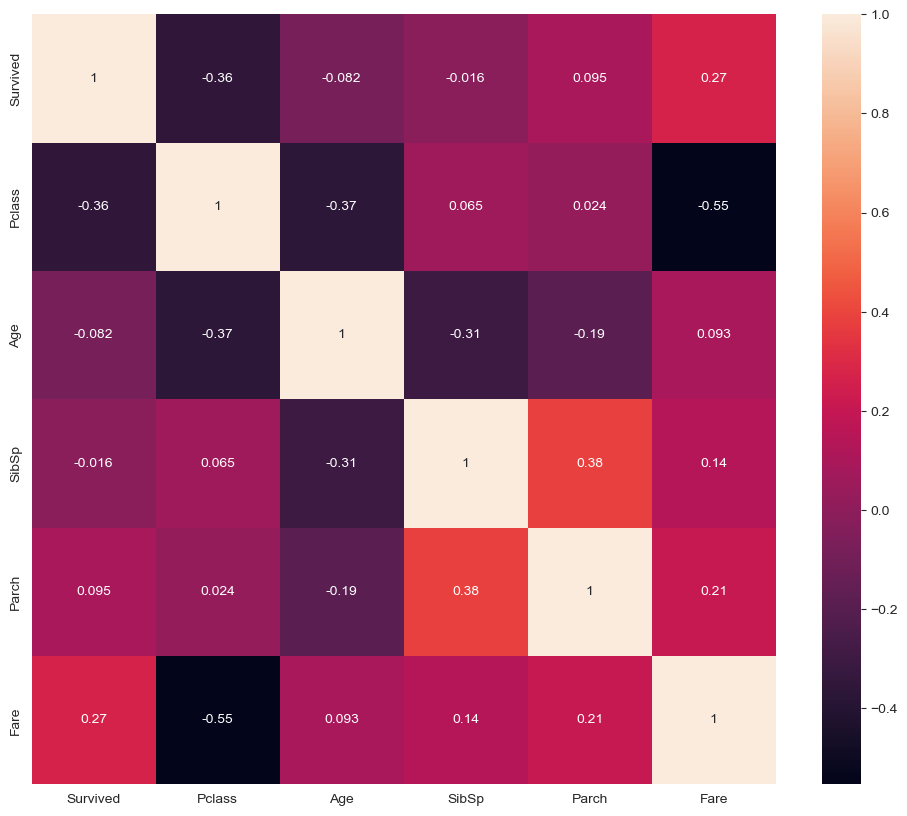

In [16]:
# build the heatmap to show correlation between features
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(titanic_data_corr, annot=True)

In [17]:
# Import preprocessing from sklearn
from sklearn import preprocessing

# Use Label encoder to number the categorical data
label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

# Check the top rows
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [18]:
# Check for the classes
label_encoding.classes_

array(['female', 'male'], dtype=object)

#### C = Cherbourg,  Q = Queenstown,  S = Southampton

In [19]:
# Use one hot encoding to denote for all three location
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [20]:
# Reset the index of the dataframe
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,36.0,0,0,7.4958,0,0,1
1,1,1,0,60.0,1,0,75.2500,1,0,0
2,0,3,0,45.0,0,0,7.7500,0,0,1
3,0,3,1,23.0,0,0,7.8958,0,0,1
4,1,2,0,36.0,1,0,26.0000,0,0,1


In [21]:
# Save the preprocessed dataset to new CSV file
titanic_df.to_csv('titanic_processed.csv', index=False)